# EEG classification

Link to working-documentation. Please, **update** when have an idea, plan or when sth important was done.


https://docs.google.com/document/d/1i7tLHpXD-uXY5BopIGGcu-KWAR1DZvSlxQbYRi4fvBI/edit?usp=sharing

### Imports

In [1]:
# %load_ext lab_black
import matplotlib
import matplotlib.pyplot as plt
import mne
import numpy as np
from utils import load_gonogo_responses, tmax, tmin

# plt.style.use("dark_background")

## Constructing epoched data 

In [2]:
epochs = load_gonogo_responses()

Extracting parameters from ../data/GNG_AA0303--Seg Response 5.vhdr...
Setting channel info structure...
Finding 'sfreq' from header file: ../data/GNG_AA0303--Seg Response 5.vhdr
Used Annotations descriptions: ['Stimulus/RE*ex*1_n*1_c_1*R*FB', 'Stimulus/RE*ex*1_n*1_c_1*R*FG', 'Stimulus/RE*ex*1_n*1_c_2*R', 'Stimulus/RE*ex*1_n*2_c_1*R', 'Stimulus/RE*ex*2_n*1_c_1*R', 'Stimulus/RE*ex*2_n*2_c_1*R*FB', 'Stimulus/RE*ex*2_n*2_c_1*R*FG', 'Stimulus/RE*ex*2_n*2_c_2*R']
Not setting metadata
Not setting metadata
305 matching events found
No baseline correction applied
0 projection items activated
Loading data for 305 events and 181 original time points ...
1 bad epochs dropped


### Data Visualisation

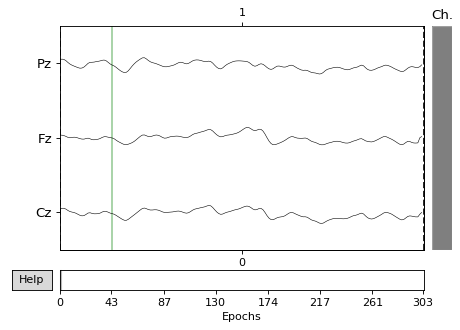

In [3]:
epochs.plot(n_epochs=1, event_colors={0: "g", 1: "m"})
None  # prevents doubled output

In [4]:
correct_response_epochs = epochs["correct_response"]
error_response_epochs = epochs["error_response"]


# Calculate averages of events sets
correct_response_evoked = correct_response_epochs.average()
error_response_evoked = error_response_epochs.average()

combining channels using "mean"
combining channels using "mean"


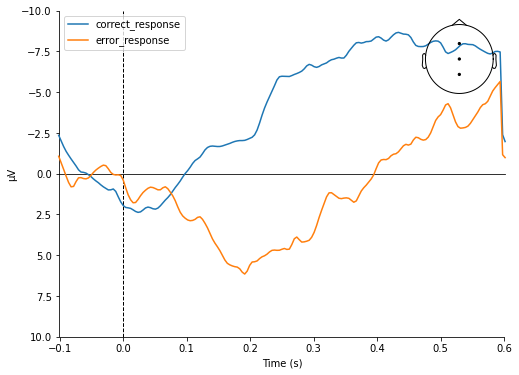

[<Figure size 576x432 with 2 Axes>]

In [6]:
# Averages of two event sets

mne.viz.plot_compare_evokeds(
    dict(
        correct_response=correct_response_evoked, error_response=error_response_evoked
    ),
    legend="upper left",
    show_sensors="upper right",
    ylim=dict(eeg=[-10, 10]),
    invert_y=True,
    combine="mean"
)

No projector specified for this dataset. Please consider the method self.add_proj.


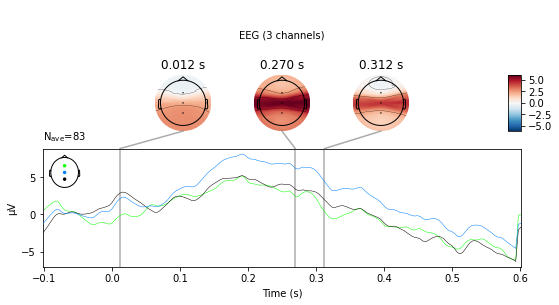

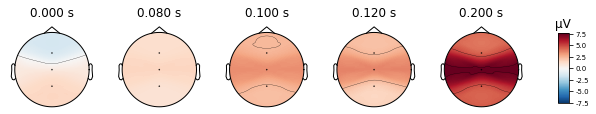

In [7]:
# Averages of error response events per channel

error_response_evoked.plot_joint(picks="eeg")
error_response_evoked.plot_topomap(times=[0.0, 0.08, 0.1, 0.12, 0.2], ch_type="eeg")
None

No projector specified for this dataset. Please consider the method self.add_proj.


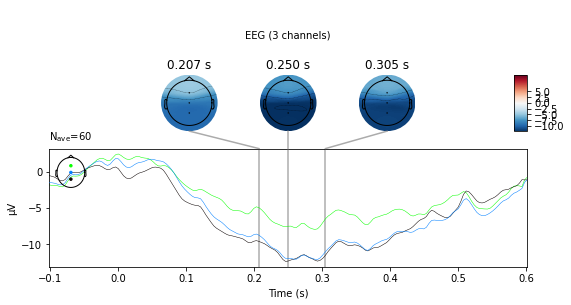

In [8]:
# Averages of merged event sets (diff between error and correct) per channel

evoked_diff = mne.combine_evoked(
    [correct_response_evoked, error_response_evoked], weights=[1, -1]
)
evoked_diff.plot_joint()
None

In [9]:
events_mean_dict = {}

for key in epochs.event_id.keys():
    mean_key = key + "_mean"
    events_mean_dict[mean_key] = epochs[key]._data.mean(axis=(0))

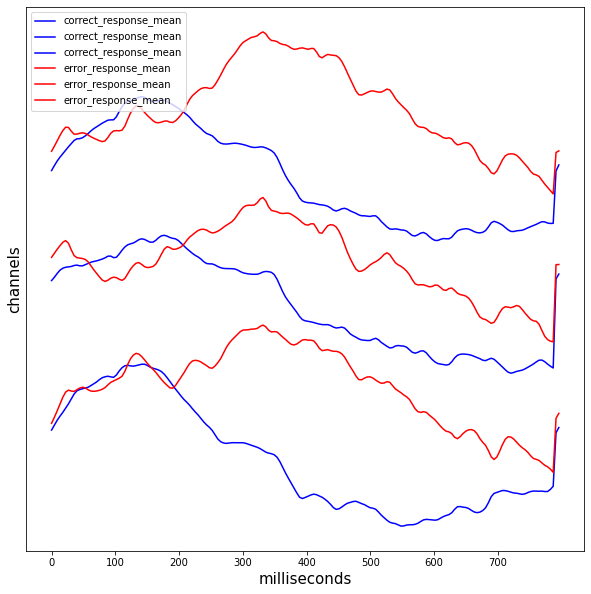

In [10]:
# Chart with averages of correct and error responses per channel

colors = ["b", "r", "g"]
color_iterator = 0

plt.figure(figsize=(10, 10))


for key in events_mean_dict:
    epoch = events_mean_dict[key]
    plt.plot(
        epoch.T + np.arange(start=1e-6, step=10e-6, stop=301e-7),
        label=key,
        color=colors[color_iterator],
    )
    color_iterator = color_iterator + 1

plt.yticks([])
plt.xticks(np.arange(0, 181, 181 / 8), np.arange(0, 800, 100))
plt.xlabel("milliseconds", fontsize=15)
plt.ylabel("channels", fontsize=15)
plt.legend(loc="upper left")
plt.show()

## Pre-processing

**Pre-processing done with Brain Vision Software:**

- Notch filter  0.05-25
- Baseline Correction //what baseline?
- Ocular Correction
- Artifact Rejection

## Feature extraction

Feature extraction recommended for eeg data is **Wavelet Transform** (especially **Discrite Wavelet Transform**). Better that FFT for biomedical signals because of its localization characteristics of non-stationary signals in time and frequency domains. DWT decompositing signal into five frequency bands.

https://en.wikipedia.org/wiki/Discrete_wavelet_transform

https://journals.plos.org/plosone/article/file?id=10.1371/journal.pone.0173138&type=printable